In [1]:
'''
Medical Image Data Analysis, 2022

Homework 3

Deep Learning Classification

'''

'\nMedical Image Data Analysis, 2022\n\nHomework 3\n\nDeep Learning Classification\n\n'

In [2]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import skimage
from glob import glob
from scipy import io
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [3]:
# 2.1 Display a long axis image and a short axis image on a figure.
# What is the anatomical difference between the two?
# (10 points)

In [4]:
# preprocessing func; read img by png_list(name;str) include resizing process.
def preprocessing(png_list, num):
    if (num == 0) or (num == 1) :
        globals()['img_list' + str(num)] = []
        globals()['label_list' + str(num)] = [] # 0 = LA, 1 = SA
        for jj, ffname in enumerate(png_list):
            img1 = imageio.imread(ffname)
            img2 = skimage.transform.resize(img1, (128, 128), anti_aliasing=True, preserve_range=False)    
            # img2 = img2/np.max(img2) # normalize image to [0 1]
            # print(img1.shape, img2.shape)

            globals()['img_list' + str(num)].append(img2)

            globals()['label_list' + str(num)].append(num)
    else:
        return # exit the func
    
        # if num == 0 :
        #     globals()['label_list'+str(num)].append(0)
        # if num == 1 :
        #     globals()['label_list'+str(num)].append(1)

In [5]:
# comparison; a couple of image func
def compare_image(image1, image2):
    
    plt.figure()
    plt.subplot(121)
    plt.imshow(image1, cmap='gray')
    plt.title('Long Axis')
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(image2, cmap='gray')
    plt.title('Short Axis')
    plt.axis('off')

In [6]:
import random

axis_views = ['long', 'short']
compare_image_list = []
for i, j in zip(axis_views, range(len(axis_views))) : # n값 변환에 따라 데이터 수가 많아질 때, 해당 코드의 확장 가능성 있음.
    initial = (i[0]).upper() # j = (i.capitalize())[0]
    png_list = 'png_'+ initial +'A_list'
    globals()[png_list] = glob('data/' + i + 'axis_' + 'n=200' + '/*.png')
    preprocessing(globals()[png_list], j)  # 0 = LA, 1 = SA

for i in range(len(axis_views)):
    img = (globals()['img_list' + str(i)])[random.randrange(len(globals()['img_list' + str(i)]))]
    compare_image_list.append(img)

print(len(png_LA_list), len(png_SA_list))
# print(png_LA_list)
# print(png_LA_list)


200 200


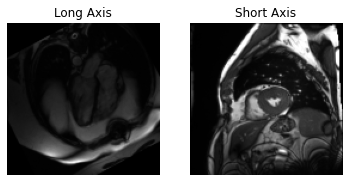

In [7]:
# random sampling only one image
# compare between LA image and SA image (index 0 : LA, index 1 : SA)
compare_image(compare_image_list[0], compare_image_list[1])

In [8]:
# 2.2 Comment the lines with model.add(BatchNomalization()) and report the comparison plots
# of the learning curves for the cases of with and without model.add(BatchNomalization()).
# (10 points)

In [9]:
# 2.3 When the lines with model.add( BatchNormalization() ) are commented, what are
# the scores of AUC, accuracy, precision, recall, and f1_score when the testing data is
# used? Use the trained model that is obtained when the epoch is 20. (10 points)

In [10]:
from sklearn.model_selection import train_test_split

img_list = img_list0 + img_list1
label_list = label_list0 + label_list1

png_fname_list = png_LA_list + png_SA_list

X = np.stack(img_list, axis=0)
y = np.stack(label_list, axis=0)
z = np.stack(png_fname_list, axis=0)

# train / validation split
X_train, X_test, y_train, y_test, z_train, z_test = train_test_split(X, y, z, test_size = 0.3, random_state = 2334141)

print(X.shape, y.shape)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print(y_train)

print(np.where(y_train==1)[0].shape)


(400, 128, 128) (400,)
(280, 128, 128) (280,)
(120, 128, 128) (120,)
[1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0
 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0
 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1
 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1
 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1
 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0]
(145,)


In [11]:
from tensorflow import keras
import keras.backend as K

def grayscale_to_rgb(images, channel_axis=-1):
    images = K.expand_dims(images, axis=channel_axis)
    tiling = [1]*4 # dimensions: B, H, W, C
    tiling[channel_axis] *= 3
    images = K.tile(images, tiling)

    return images

X_train3 = grayscale_to_rgb(X_train)
X_test3 = grayscale_to_rgb(X_test)

print(X_train3.shape, X_test3.shape)

(280, 128, 128, 3) (120, 128, 128, 3)


2022-12-12 14:09:36.061276: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-12 14:09:36.075011: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-12 14:09:36.075269: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-12 14:09:36.075942: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the app

In [12]:
from keras.models import Model, Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from sklearn.utils import class_weight

In [13]:
gpu_no = '/gpu:0'
# gpu_no = '/cpu:0'

n_filter = 16 # 필터의 개수(특징 맵의 개수)
kernel1 = (3, 3) # 커널 사이즈 (주로 2개의 정수가 들어있는 튜플, 혹은 리스트 형태)
padding1 = 'same' #"valid" 혹은 "same"
strides1 = (1, 1) # 움직이는 거리 (= convolution layer의 size)
input_shape = (128, 128, 3) # 계층을 처음 사용할 때, 4-D 데이터에서 batches값을 뺀 (rows,cols,channels)를 받음 이미지는 주로 채널 3개(RGB)
pool_size1 = (2, 2) # pooling size = 2이면 크기가 절반으로 줄어드는 출력층을 만들어 냄.

learning_rate = 0.00001
batch_size = 4 # batch size란 하나의 소그룹게 속하는 데이터 수(작은 단위로 나눠서 학습 시간을 단축)
n_epochs = 20 # epoch는 전체 트레이닝 셋이 신경망을 통과할 횟수 

In [14]:
def gen_cnn_model(gpu_no, model, model_path, X_train, y_train, X_val, y_val, batch_size, n_epochs):
     # model_num ; 0: Without Batch Nomarlization, 1 : Using Batch Nomarlization 
    batch_size_val = batch_size
    ntrain = X_train.shape[0]
    nvalid = X_val.shape[0]

    steps_per_epoch = ntrain//batch_size
    validation_steps = nvalid//batch_size_val
    
    y_train_encode = to_categorical(y_train)
    y_val_encode = to_categorical(y_val)
    
    dir_model = model_path
    
    if not os.path.exists(dir_model):
        os.makedirs(dir_model)
    
    filepath = dir_model + "/CNN_e{epoch:02d}.h5" # "/CNN_e{epoch:02d}_valacc{val_accuracy:.2f}.h5"
    
    checkpoint = ModelCheckpoint(filepath, monitor = 'val_acc', verbose = 1, save_best_only = False, mode = 'max')
    callbacks_list = [checkpoint]
    
    class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y = y_train)
    class_weights = dict(enumerate(class_weights))
    
    with K.tf.device(gpu_no):
        history = model.fit(x=X_train, y=y_train_encode,
                            batch_size=batch_size,
                            epochs=n_epochs,
                            steps_per_epoch=steps_per_epoch,
                            #class_weight=class_weights,
                            callbacks=callbacks_list,
                            validation_data=(X_val, y_val_encode)
                           )
    return history
    


In [15]:
# learning curve, plot
# print(history1)
# print(history1.history.keys())
def LossAccuracy_Plot(history1):
    acc = history1.history['accuracy']
    val_acc = history1.history['val_accuracy']
    loss = history1.history['loss']
    val_loss = history1.history['val_loss']
    epochs = range(1, len(acc)+1)

    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.plot(epochs, loss, 'b-.', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.xlabel('Epoch')
    plt.title('Loss')
    plt.ylim(0.0, 1.0)
    plt.grid(True)
    plt.legend()

    plt.subplot(122)
    plt.plot(epochs, acc, 'b-.', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.xlabel('Epoch')
    plt.title('Accuracy')
    plt.ylim(0.4, 1.0)
    plt.grid(True)
    if model_num == 0 :
        plt.suptitle('Without Batch Nomalization', fontsize=16)
        
    if model_num == 1 :
        plt.suptitle('Using Batch Nomalization', fontsize=16)
    
    plt.legend()
    

In [16]:
def model_fn(model_num):
        model = Sequential()
        model.add( Conv2D( filters = n_filter, kernel_size = kernel1, padding = padding1, strides = strides1, input_shape = input_shape) )

        if model_num == 1:
            model.add( BatchNormalization())

        model.add( Activation('relu'))
        model.add( MaxPooling2D(pool_size = pool_size1) )
        model.add( Conv2D(filters=2*n_filter, kernel_size=kernel1, padding=padding1, strides=strides1))

        if model_num == 1:
            model.add( BatchNormalization())

        model.add( Activation('relu')) # 0 이하의 값은 다음 레이어에 전달하지 않습니다. 0이상의 값은 그대로 출력합니다.
        model.add( MaxPooling2D(pool_size = pool_size1))
        model.add( Flatten())
        model.add( Dense(64))
        model.add( Activation('relu'))
        model.add( Dropout(0.5))
        model.add(Dense(2, activation='sigmoid')) # 입력 값을 0과 1 사이의 값으로 변환하여 출력합니다.
        model.compile ( optimizer = Adam(learning_rate = learning_rate), loss = 'binary_crossentropy',  metrics=['accuracy'])
        
        return model
    
    

In [17]:
import os, shutil
for num in range(0, 2):
    dir = 'model_test' + str(num) +'/'
    for files in os.listdir(dir):
        path = os.path.join(dir, files)
        try:
            shutil.rmtree(path)
        except OSError:
            os.remove(path)

Epoch 1/20


2022-12-12 14:09:38.161960: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8200
2022-12-12 14:09:39.652636: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


65/70 [==========================>...] - ETA: 0s - loss: 0.6484 - accuracy: 0.5077
Epoch 1: saving model to model_test0/CNN_e01.h5
70/70 [==============================] - 4s 10ms/step - loss: 0.6520 - accuracy: 0.5000 - val_loss: 0.6387 - val_accuracy: 0.4583
Epoch 2/20
65/70 [==========================>...] - ETA: 0s - loss: 0.6051 - accuracy: 0.5462
Epoch 2: saving model to model_test0/CNN_e02.h5
70/70 [==============================] - 0s 7ms/step - loss: 0.6068 - accuracy: 0.5393 - val_loss: 0.6053 - val_accuracy: 0.4750
Epoch 3/20
67/70 [===========================>..] - ETA: 0s - loss: 0.5843 - accuracy: 0.5858
Epoch 3: saving model to model_test0/CNN_e03.h5
70/70 [==============================] - 0s 6ms/step - loss: 0.5836 - accuracy: 0.5929 - val_loss: 0.5687 - val_accuracy: 0.5750
Epoch 4/20
69/70 [============================>.] - ETA: 0s - loss: 0.5378 - accuracy: 0.6812
Epoch 4: saving model to model_test0/CNN_e04.h5
70/70 [==============================] - 0s 6ms/step - 

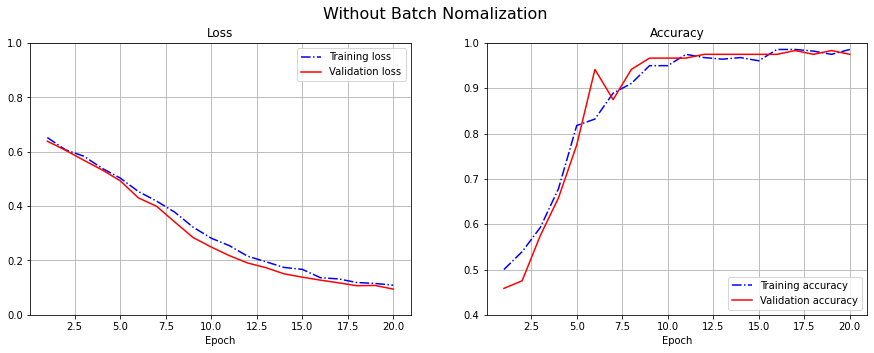

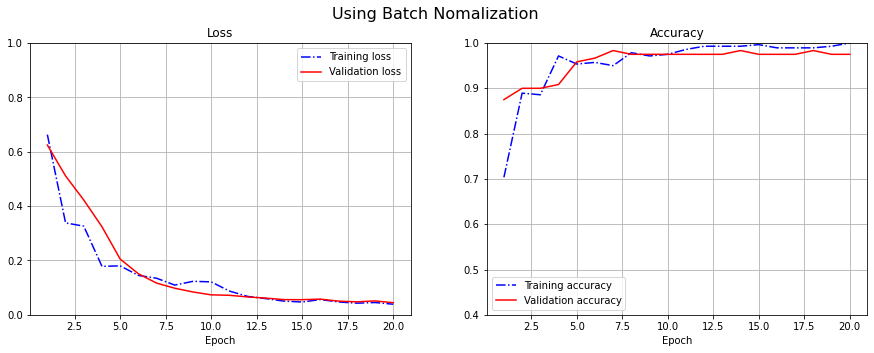

In [18]:
import tensorflow_addons as tfa
from sklearn.metrics import f1_score 
with K.tf.device(gpu_no):
    for i in range(2):
        model_num = i
        model_path = 'model_test' + str(model_num)
        model = model_fn(model_num)
    # if (model_num == 0) and (model_num == 1): # model_num ; 0: Without Batch Nomarlization, 1 : Using Batch Nomarlization

        globals()['history' + str(model_num)] = gen_cnn_model(gpu_no, model, model_path, X_train3, y_train, X_test3, y_test, batch_size, n_epochs)
        model.summary()
        print('\n\n\n')
        
        LossAccuracy_Plot(globals()['history' + str(model_num)])

In [19]:
# prediction on test images using the trained model

model_num = 0
epoch_num = 20
# model_valacc = '0.98'
# model_fname = '/hw3/model_test' + str(model_num) + '/CNN_' +  'e'+ str(epoch_num).zfill(2) + '_valacc' + model_valacc + '.h5'
model_fname = '/hw3/model_test' + str(model_num) + '/CNN_' +  'e'+ str(epoch_num).zfill(2) + '.h5'
model = keras.models.load_model(model_fname, compile=True)


In [20]:
prob_score = model.predict(X_test3, batch_size=1, verbose=0)

# print(prob_score.shape)
# print(prob_score)

In [21]:
# LA + SA = 1이 되는지 확인
prob_score[:,0]+prob_score[:,1]  # 1에서부터 오차가 있음을 확인 -> Nomalization (Norm-l1 : 합이 1이 되게)

array([1.0181047 , 0.9970825 , 1.0002606 , 0.998382  , 0.98927623,
       1.0256369 , 0.99932706, 0.9980979 , 1.0135244 , 0.99885   ,
       0.9984545 , 0.9945174 , 1.0468284 , 1.0031437 , 1.0658237 ,
       0.9994035 , 1.0556134 , 0.9992529 , 1.0112555 , 0.9980259 ,
       0.99170506, 1.0084306 , 1.003215  , 0.96159065, 0.9976949 ,
       1.002262  , 1.0029647 , 1.0013802 , 1.0028332 , 0.999773  ,
       1.01124   , 0.99835235, 1.0024359 , 1.0031586 , 1.0345211 ,
       1.0085129 , 0.9981316 , 1.0182033 , 1.115829  , 1.0358418 ,
       0.98331445, 0.99696356, 1.0034761 , 1.0091805 , 1.0034516 ,
       0.97773814, 1.0043825 , 0.9983977 , 1.0019023 , 1.0018662 ,
       1.0054781 , 1.0173708 , 0.998565  , 1.000122  , 1.0072081 ,
       1.0073099 , 1.0007306 , 0.9999619 , 0.9992868 , 1.0019163 ,
       1.0710167 , 1.094151  , 0.9989119 , 0.9925684 , 0.9951189 ,
       1.0015998 , 1.0165038 , 0.99847966, 1.010708  , 0.995617  ,
       0.9960468 , 1.0003964 , 1.0014002 , 1.0313287 , 1.00552

In [22]:
from sklearn.preprocessing import normalize
for i in range(y_test.shape[0]):
    prob_score[i] = normalize([prob_score[i]], norm="l1")

In [23]:
# print(prob_score)

In [24]:
print(prob_score[:,0]+prob_score[:,1])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [25]:
y_pred = np.zeros((prob_score.shape[0], 1))
y_pred[prob_score[:,1]>=0.5] = 1 # 1일 때 SA
# print(y_pred)

In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


y_train_encode = to_categorical(y_train)
y_test_encode = to_categorical(y_test)
    
accuracy = model.evaluate(X_test3, y_test_encode)[1]
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

roc_score = roc_auc_score(y_test, y_pred)
precision = tp / (tp + fp)
recall = tp / (tp+fn)
f1score = (2*precision*recall)/(precision+recall)

import pandas as pd
col = ['scores']
ind = ['AUC', 'Accuracy', 'Precision', 'Recall', 'F1-score']
con = [roc_score, accuracy, precision, recall, f1score]

df = pd.DataFrame(con,columns=col,index=ind)
df.transpose()

4/4 [==============================] - 0s 31ms/step - loss: 0.0945 - accuracy: 0.9750


,AUC,Accuracy,Precision,Recall,F1-score
scores,0.975524,0.975,0.964286,0.981818,0.972973


In [27]:
# 2.4. For the result of 2.3, show the confusion matrix and the ROC curve.
# Find a testing image example that shows the classification error. Show the example image in a figure,
# and include the probability score and the png file name on the figure title.
# (10 points)

cutoff = 0.3934400975704193


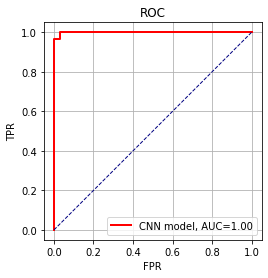

In [28]:
# ROC 

from sklearn import metrics

fpr1, tpr1, thresh1 = metrics.roc_curve(y_test, prob_score[:, 1], pos_label=1)
roc_auc_1 = metrics.auc(fpr1, tpr1)

ind1 = np.argmax(tpr1 - fpr1)

print(f'cutoff = {thresh1[ind1]}')
        
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(fpr1, tpr1, '-', color='red', alpha = 1.0, lw = 2, label = 'CNN model, AUC=%0.2f' % roc_auc_1)

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc='lower right')
plt.grid(True)

ax.set_aspect('equal')
plt.show()

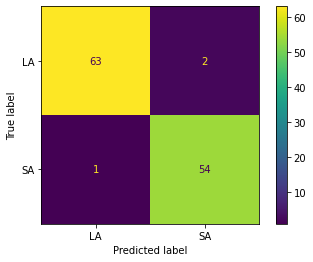

In [29]:
label_order=['LA', 'SA']

y_test2 = []
for jj in range(y_test.shape[0]):
    if y_test[jj]==0:
        y_test2.append('LA')  
    else:  y_test2.append('SA')

# print(y_test2)

# print(y_pred.shape)

y_pred2 = []
for jj in range(y_pred.shape[0]):
    if y_pred[jj]==0:
        y_pred2.append('LA')  
    else:  y_pred2.append('SA')    

# print(y_pred2)

cm = metrics.confusion_matrix(y_test2, y_pred2, labels=label_order)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_order)
disp.plot()

In [30]:
# 0 = LA, 1 = SA
Type2_error = [] #False Negative(왼쪽 아래); True label = 0 / Predict label = 1
Type1_error = [] #False Positive(오른쪽 위); True label = 1 / Predict label = 0

if y_test.shape[0] == y_pred.shape[0] :
    for index in range(y_test.shape[0]) :
        if (y_test2[index] == 'LA' and y_pred2[index] == 'SA'):
            Type1_error.append(index)
        elif (y_test2[index] == 'SA' and y_pred2[index] == 'LA'):
            Type2_error.append(index)
            
error = [Type2_error, Type1_error] #Type 2 is Ture long / Type 1 is Ture short

In [31]:
for ii, jj in enumerate(error):
    print(ii)
    print(jj)

0
[114]
1
[5, 61]


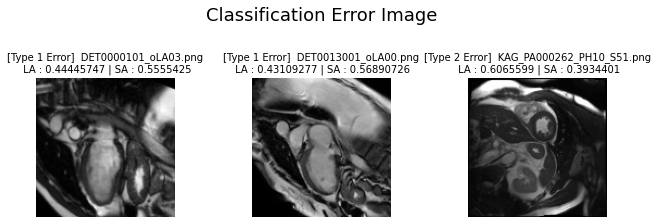

In [33]:
import matplotlib.pyplot as plt
import numpy as np

#Type 2 is Ture long / Type 1 is Ture short
cnt = len(Type1_error) + len(Type2_error)
fig, arr = plt.subplots(1, cnt, figsize = ((cnt)*cnt, cnt), layout = "constrained")
fig.suptitle('Classification Error Image\n', fontsize=18)
pn = ['N', 'P']
cnt -= 1 # cnt : 3 인덱스 보정 : 0 ~ 2 -> 2 ~ 0, Type 1부터 2를 순방향으로 출력하기 위해 인덱스 뒤에서부터 감소하여 사용
for cnt1, error_labeled in enumerate(error): # cnt 0 -> 1 (Type 2 ; FN -> Typer 1 ; FP)
    if not len(error_labeled) == 0 :
        for cnt2, i in enumerate(error_labeled): # axis_views = ['long', 'short']
                file_name = (z_test[i]).lstrip('data/'+ axis_views[1-cnt1] +'axis'+ '_n=200/')
                prob = ' LA : ' + str(prob_score[i][0]) + ' | '+ 'SA : ' + str(prob_score[i][1])
                Type_order = 'Type ' + str(2-cnt1) + ' Error' #+ '(' + 'F' + pn[cnt1] + ')'
                
                arr[cnt].imshow(X_test3[i])
                arr[cnt].set_title('['+Type_order+']  '+file_name+'\n'+ prob, fontsize = 10)
                arr[cnt].axis('off')
                cnt -= 1
plt.show()
